do time series prediction on Euro exchange data
use ARIMA model
select any one currency(e.g-for indian rupee or canedian rupee)
* 1. make data stationary

* 2.visualize TS component

* 3.prediction using ARIMA with two different values pf p,d,q

compare the two ARIMA models based on RMSE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
currency=pd.read_csv('euro-daily-hist_1999_2022.csv')
currency.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [3]:
currency.dropna(axis=1)

,Period\Unit:,[Australian dollar ],[Canadian dollar ],[Swiss franc ],[Czech koruna ],[Danish krone ],[UK pound sterling ],[Hong Kong dollar ],[Hungarian forint ],[Indonesian rupiah ],...,[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Swedish krona ],[Singapore dollar ],[Thai baht ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.4630,0.9707,23.648,7.4489,0.86813,8.4230,371.61,16085.65,...,4.9465,11.8218,1.7656,60.011,4.5354,11.5280,1.4520,37.2630,1.0751,21.0148
1,2023-05-25,1.6443,1.4599,0.9708,23.645,7.4502,0.86793,8.4092,372.30,16040.83,...,4.9655,11.7695,1.7655,60.132,4.5110,11.5490,1.4515,37.1540,1.0735,20.7466
2,2023-05-24,1.6402,1.4600,0.9732,23.671,7.4477,0.86993,8.4462,372.70,16063.50,...,4.9536,11.8175,1.7582,60.068,4.4900,11.5103,1.4526,37.1710,1.0785,20.7479
3,2023-05-23,1.6282,1.4571,0.9718,23.681,7.4475,0.86993,8.4480,376.45,16043.23,...,4.9260,11.7920,1.7246,60.052,4.5018,11.4494,1.4527,37.4350,1.0779,20.7920
4,2023-05-22,1.6294,1.4618,0.9700,23.676,7.4478,0.86846,8.4696,374.73,16100.33,...,4.9218,11.7765,1.7232,60.353,4.5133,11.3765,1.4554,37.2820,1.0822,20.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,1999-01-08,1.8406,1.7643,1.6138,34.938,7.4433,0.70940,9.0302,250.15,9321.63,...,4.4295,8.5900,2.1557,44.295,4.0363,9.1650,1.9537,42.5590,1.1659,6.7855
6307,1999-01-07,1.8474,1.7602,1.6165,34.886,7.4431,0.70585,9.0131,250.09,9218.77,...,4.4203,8.6295,2.1531,44.436,4.0165,9.1800,1.9436,42.1678,1.1632,6.8283
6308,1999-01-06,1.8820,1.7711,1.6116,34.850,7.4452,0.70760,9.1010,250.67,9337.68,...,4.4637,8.7335,2.1890,44.872,4.0065,9.3050,1.9699,42.6949,1.1743,6.7307
6309,1999-01-05,1.8944,1.7965,1.6123,34.917,7.4495,0.71220,9.1341,250.80,9314.51,...,4.4805,8.7745,2.2011,44.745,4.0245,9.4025,1.9655,42.5048,1.1790,6.7975


In [4]:
currency.shape


(6311, 41)

In [5]:
currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

## 1. make data stationary

In [6]:
currency['Indian_rupee'] = pd.to_numeric(currency['[Indian rupee ]'],errors = 'coerce')

In [7]:
Indian_currency = pd.DataFrame(currency['Indian_rupee'])
Indian_currency['Date'] = currency['Period\\Unit:']
Indian_currency.dropna(inplace=True)
Indian_currency

,Indian_rupee,Date
0,88.8049,2023-05-26
1,88.8055,2023-05-25
2,89.1473,2023-05-24
3,89.2675,2023-05-23
4,89.6710,2023-05-22
...,...,...
6038,44.0060,2000-01-19
6039,43.9980,2000-01-18
6040,43.9790,2000-01-17
6041,44.4730,2000-01-14


In [8]:
Indian_currency['Date']=pd.to_datetime(Indian_currency['Date'],errors='coerce')
Indian_currency.set_index("Date",inplace=True)
Indian_currency


,Indian_rupee
Date,
2023-05-26,88.8049
2023-05-25,88.8055
2023-05-24,89.1473
2023-05-23,89.2675
2023-05-22,89.6710
...,...
2000-01-19,44.0060
2000-01-18,43.9980
2000-01-17,43.9790


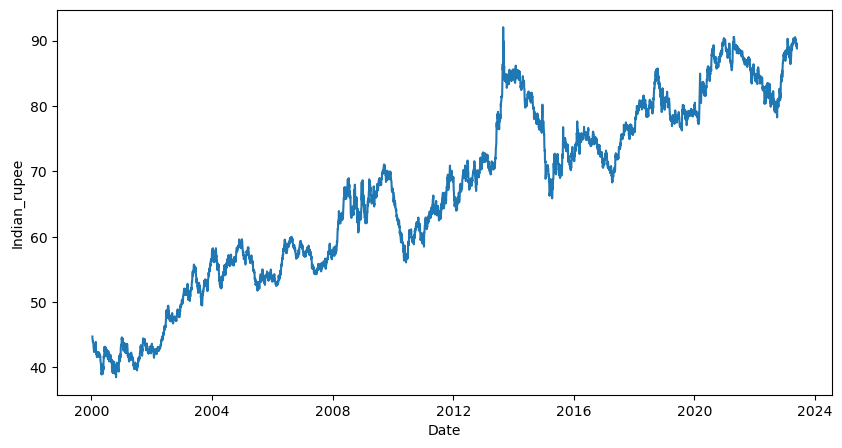

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Indian_currency,x=Indian_currency.index,y=Indian_currency.Indian_rupee)
plt.show()

In [10]:
# Calculate and plot rolling mean and standard deviation for 12 months
Indian_currency['rollMean']  = Indian_currency.Indian_rupee.rolling(window=365).mean()
Indian_currency['rollstd']  = Indian_currency.Indian_rupee.rolling(window=365).std()

In [11]:
Indian_currency['rollMean'].tail()

Date
2000-01-19    41.545682
2000-01-18    41.555315
2000-01-17    41.566055
2000-01-14    41.577871
2000-01-13    41.590978
Name: rollMean, dtype: float64

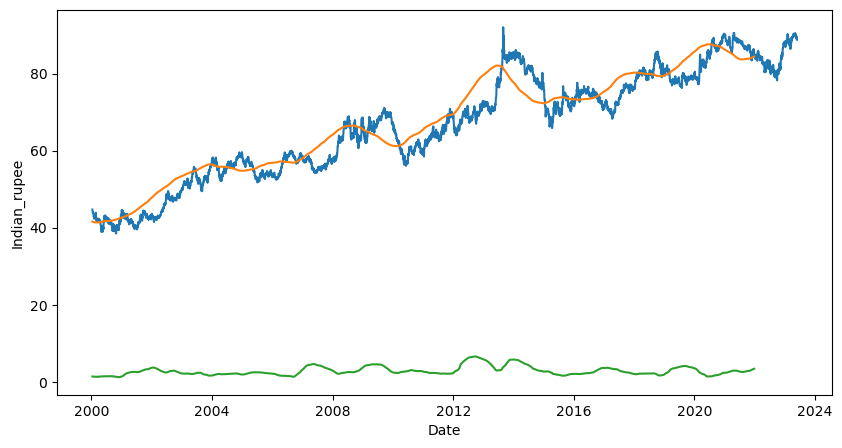

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Indian_currency,x=Indian_currency.index,y=Indian_currency.Indian_rupee)
sns.lineplot(data=Indian_currency,x=Indian_currency.index,y=Indian_currency.rollMean)
sns.lineplot(data=Indian_currency,x=Indian_currency.index,y=Indian_currency.rollstd)
plt.show()

Conclusion: Mean is not stationary, SD is stationary; so our data is not stationary

In [13]:
# Making data stationary
Indian_currency_log=np.sqrt(Indian_currency['Indian_rupee'])
Indian_currency_diff=Indian_currency_log.diff().dropna()

In [14]:
from statsmodels.tsa.stattools import adfuller

result=adfuller (Indian_currency_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -24.975060
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


As the ADF test statics is lesser (more negative) then the critical value becomes the reason to reject the null hypothesis. This indicates that the data is stationary.

## 2.visualize TS component

In [15]:
Indian_currency['mavg']  = Indian_currency.Indian_rupee.rolling(window=365).mean().shift(1)

In [16]:
Indian_currency.head(15)

,Indian_rupee,rollMean,rollstd,mavg
Date,,,,
2023-05-26,88.8049,NaN,NaN,NaN
2023-05-25,88.8055,NaN,NaN,NaN
2023-05-24,89.1473,NaN,NaN,NaN
2023-05-23,89.2675,NaN,NaN,NaN
2023-05-22,89.6710,NaN,NaN,NaN
2023-05-19,89.4215,NaN,NaN,NaN
2023-05-18,89.2915,NaN,NaN,NaN
2023-05-17,89.1878,NaN,NaN,NaN
2023-05-16,89.4655,NaN,NaN,NaN


In [17]:
Indian_currency.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5982 entries, 2023-05-26 to 2000-01-13
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Indian_rupee  5982 non-null   float64
 1   rollMean      5618 non-null   float64
 2   rollstd       5618 non-null   float64
 3   mavg          5617 non-null   float64
dtypes: float64(4)
memory usage: 233.7 KB


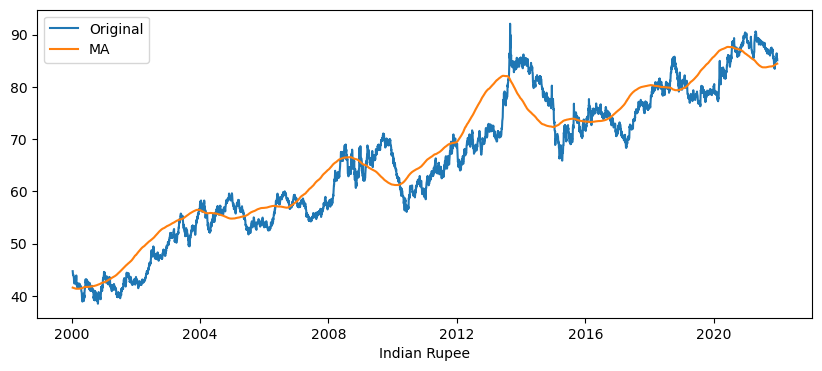

In [18]:
plt.figure(figsize=(10,4))
plt.xlabel("Indian Rupee")
plt.ylabel
plt.plot(Indian_currency['Indian_rupee'][365:],label = "Original")
plt.plot(Indian_currency['mavg'][365:],'-' ,label = "MA")
plt.legend()
plt.show()

In [19]:
Indian_currency['ewm']= Indian_currency['Indian_rupee'].ewm(alpha=0.003).mean()
Indian_currency

,Indian_rupee,rollMean,rollstd,mavg,ewm
Date,,,,,
2023-05-26,88.8049,NaN,NaN,NaN,88.804900
2023-05-25,88.8055,NaN,NaN,NaN,88.805200
2023-05-24,89.1473,NaN,NaN,NaN,88.919576
2023-05-23,89.2675,NaN,NaN,NaN,89.006950
2023-05-22,89.6710,NaN,NaN,NaN,89.140559
...,...,...,...,...,...
2000-01-19,44.0060,41.545682,1.340523,41.536052,43.468426
2000-01-18,43.9980,41.555315,1.345482,41.545682,43.470015
2000-01-17,43.9790,41.566055,1.349146,41.555315,43.471542


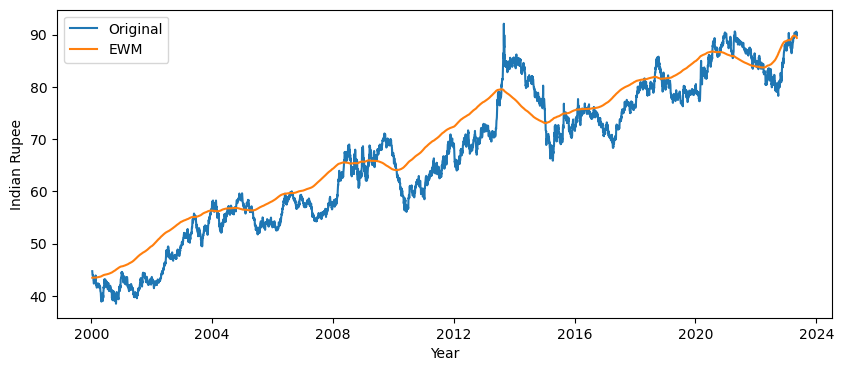

In [20]:
plt.figure(figsize=(10,4))
plt.xlabel("Year")
plt.ylabel("Indian Rupee")
plt.plot(Indian_currency['Indian_rupee'][12:],label = "Original")
plt.plot(Indian_currency['ewm'][12:],'-' ,label = "EWM")
plt.legend()
plt.show()

In [52]:
Indian_currency['first_diff']= Indian_currency['Indian_rupee'].diff(1)
Indian_currency

,Indian_rupee,rollMean,rollstd,mavg,ewm,first_diff,CurrencyPred
Date,,,,,,,
2023-05-26,88.8049,NaN,NaN,NaN,88.804900,NaN,NaN
2023-05-25,88.8055,NaN,NaN,NaN,88.805200,0.0006,NaN
2023-05-24,89.1473,NaN,NaN,NaN,88.919576,0.3418,NaN
2023-05-23,89.2675,NaN,NaN,NaN,89.006950,0.1202,NaN
2023-05-22,89.6710,NaN,NaN,NaN,89.140559,0.4035,NaN
...,...,...,...,...,...,...,...
2000-01-19,44.0060,41.545682,1.340523,41.536052,43.468426,0.0660,3.449410
2000-01-18,43.9980,41.555315,1.345482,41.545682,43.470015,-0.0080,3.516509
2000-01-17,43.9790,41.566055,1.349146,41.555315,43.471542,-0.0190,3.517303


In [22]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

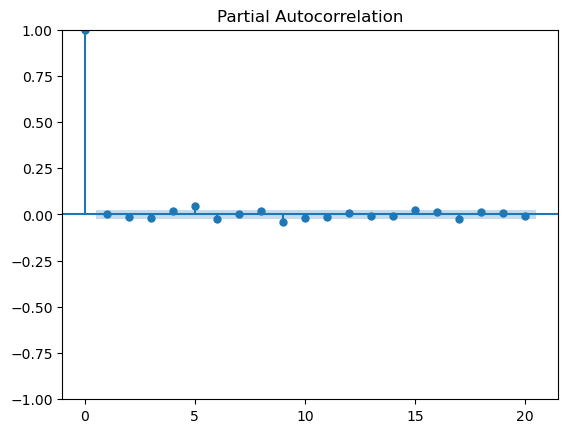

In [53]:
pacf_plot = plot_pacf(Indian_currency.first_diff.dropna(),lags =20 )

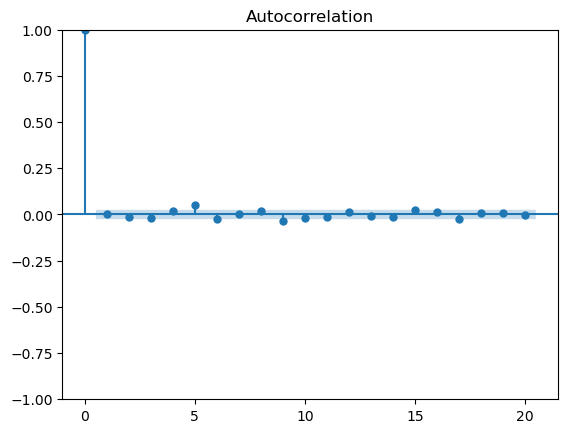

In [54]:
acf_plot = plot_acf(Indian_currency.first_diff.dropna(),lags =20 )

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
arima = ARIMA(Indian_currency['Indian_rupee'][365:],order = (1,1,1))
arima_model = arima.fit()

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/

In [56]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Indian_rupee   No. Observations:                 5617
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2818.745
Date:                Wed, 25 Oct 2023   AIC                           5643.490
Time:                        09:51:21   BIC                           5663.390
Sample:                             0   HQIC                          5650.424
                               - 5617                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0001     39.945  -2.53e-06      1.000     -78.292      78.292
ma.L1         -0.0001     39.947  -2.73e-06      1.000     -78.294      78.294
sigma2         0.1598      0.002     95.484      0.000       0.156       0.163
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6135.01
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
prediction = arima_model.predict(start=Indian_currency.index[365],end=Indian_currency.index[-1])
prediction

Date
2021-12-23     0.000000
2021-12-22    85.077500
2021-12-21    85.406931
2021-12-20    85.364809
2021-12-17    85.502471
                ...    
2000-01-19    43.940006
2000-01-18    44.005986
2000-01-17    43.998002
2000-01-14    43.979004
2000-01-13    44.472896
Name: predicted_mean, Length: 5617, dtype: float64

In [58]:
currency_pred = pd.DataFrame(arima_model.forecast(steps = 15))
currency_pred

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
5617,44.723947
5618,44.723947
5619,44.723947
5620,44.723947
5621,44.723947
5622,44.723947
5623,44.723947
5624,44.723947
5625,44.723947
5626,44.723947


In [59]:
Indian_currency['CurrencyPred'] = prediction
Indian_currency

,Indian_rupee,rollMean,rollstd,mavg,ewm,first_diff,CurrencyPred
Date,,,,,,,
2023-05-26,88.8049,NaN,NaN,NaN,88.804900,NaN,NaN
2023-05-25,88.8055,NaN,NaN,NaN,88.805200,0.0006,NaN
2023-05-24,89.1473,NaN,NaN,NaN,88.919576,0.3418,NaN
2023-05-23,89.2675,NaN,NaN,NaN,89.006950,0.1202,NaN
2023-05-22,89.6710,NaN,NaN,NaN,89.140559,0.4035,NaN
...,...,...,...,...,...,...,...
2000-01-19,44.0060,41.545682,1.340523,41.536052,43.468426,0.0660,43.940006
2000-01-18,43.9980,41.555315,1.345482,41.545682,43.470015,-0.0080,44.005986
2000-01-17,43.9790,41.566055,1.349146,41.555315,43.471542,-0.0190,43.998002


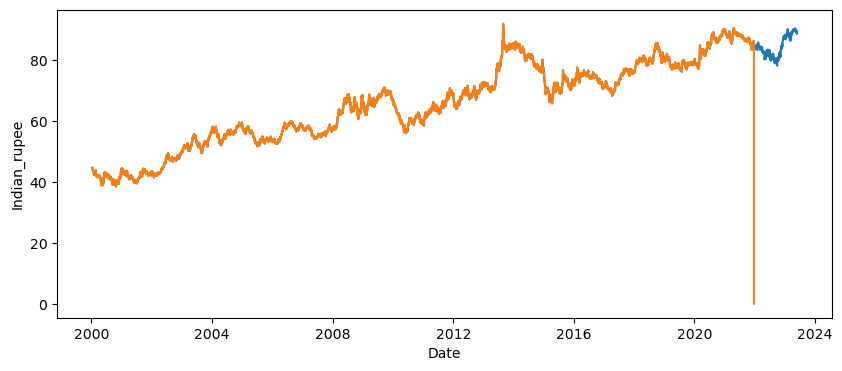

In [60]:
plt.figure(figsize=(10,4))
sns.lineplot(data=Indian_currency,x=Indian_currency.index,y='Indian_rupee')
sns.lineplot(data=Indian_currency,x=Indian_currency.index,y='CurrencyPred')
plt.show()


<Axes: xlabel='Date'>

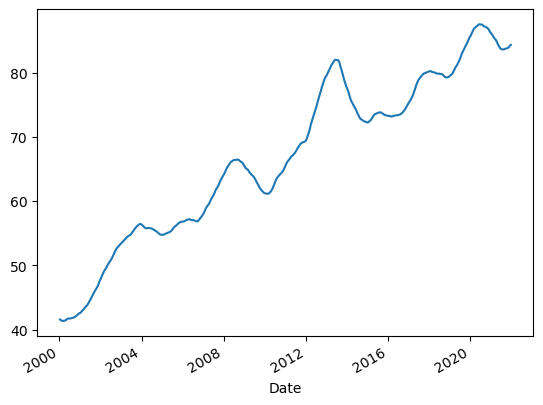

In [39]:
Indian_currency['mavg'].plot()